In [ ]:
# %pip install -c conda-forge scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


In [ ]:
# %pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   --------------------------------------- 920.8/920.8 kB 20.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import membership as mf
import matplotlib.pyplot as plt

### Define input and output variables
| Variable  | Range       |
|-----------|------------|
| Sea Water Temperature     | 280 - 310 K |
| Turbidity     | 0 - 3 /m    |
| Windspeed  | 0 - 25 km/h    |
| Bleaching Risk Level  | 0 - 100%    |


In [10]:
# Antecedent -> input variable
swt = ctrl.Antecedent(np.arange(280, 310, 0.1), 'swt')
turbidity = ctrl.Antecedent(np.arange(0, 3, 0.01), 'turbidity')
windspeed = ctrl.Antecedent(np.arange(0, 25, 0.1), 'windspeed')

# Consequent -> output variable
bleaching_risk = ctrl.Consequent(np.arange(0, 100, 0.1), 'bleaching_risk')

### Define Membership Function

Sea Water Temperature

| Linguistic Value | Fit Vector               |
| ---------------- | ------------------------ |
| Low              | (1/280, 1/290, 0/296) |
| Moderate         | (0/294, 1/298, 0/301)    |
| High             | (0/299, 1/301.5, 0/303)  |
| Extreme          | (0/302, 1/303.2, 1/310)  |


c:\Users\Christina Yap Xin Yi\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


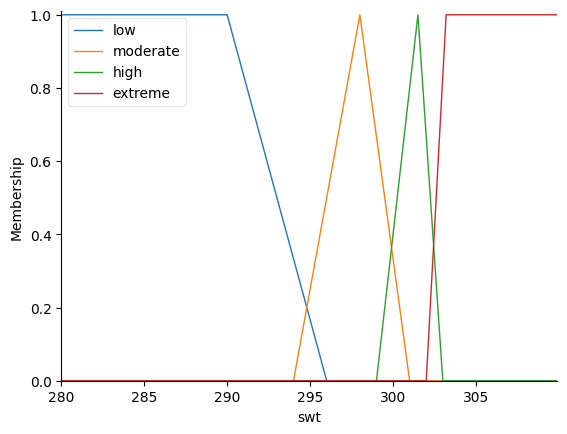

In [11]:
swt['low'] = mf.trapmf(swt.universe, [280, 280, 290, 296])
swt['moderate'] = mf.trimf(swt.universe, [294, 298, 301])
swt['high'] = mf.trimf(swt.universe, [299, 301.5, 303])
swt['extreme'] = mf.trapmf(swt.universe, [302, 303.2, 310, 310])

swt.view()

Turbidity
| Linguistic Value | Fit Vector            |
| ---------------- | --------------------- |
| Low              | (1/0, 1/0.1, 0/0.5)   |
| Moderate         | (0/0.3, 1/0.6, 0/0.9) |
| High             | (0/0.7, 1/1.0, 1/3)   |


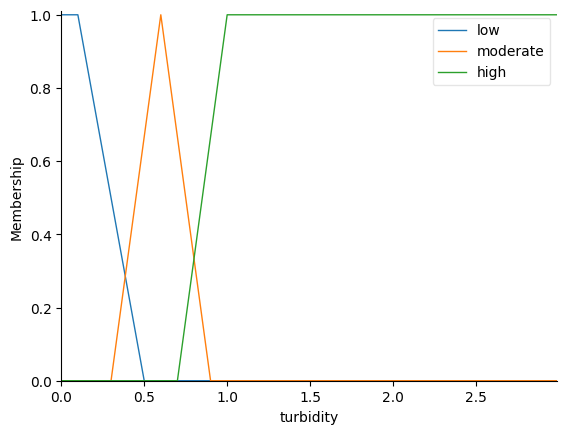

In [12]:
turbidity['low'] = mf.trapmf(turbidity.universe, [0, 0, 0.1, 0.5])
turbidity['moderate'] = mf.trimf(turbidity.universe, [0.3, 0.6, 0.9])
turbidity['high'] = mf.trapmf(turbidity.universe, [0.7, 1.0, 3, 3])

turbidity.view()

Windspeed
| Linguistic Value | Fit Vector        |
| ---------------- | ----------------- |
| Calm             | (1/0, 1/0, 0/5)   |
| Moderate         | (0/3, 1/7, 0/10)  |
| Strong           | (0/8, 1/12, 1/25) |


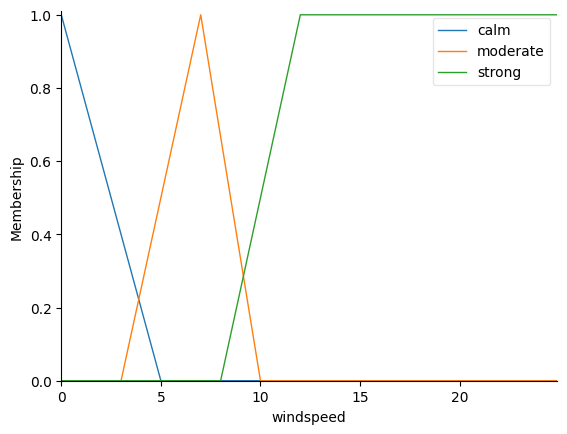

In [13]:
windspeed['calm'] = mf.trapmf(windspeed.universe, [0, 0, 0, 5])
windspeed['moderate'] = mf.trimf(windspeed.universe, [3, 7, 10])
windspeed['strong'] = mf.trapmf(windspeed.universe, [8, 12, 25, 25])

windspeed.view()

Bleaching Risk Level
| Linguistic Value | Fit Vector          |
| ---------------- | ------------------- |
| Low              | (1/0, 1/15, 0/25)   |
| Moderate         | (0/20, 1/40, 0/60)  |
| High             | (0/50, 1/70, 0/85)  |
| Severe           | (0/80, 1/90, 1/100) |


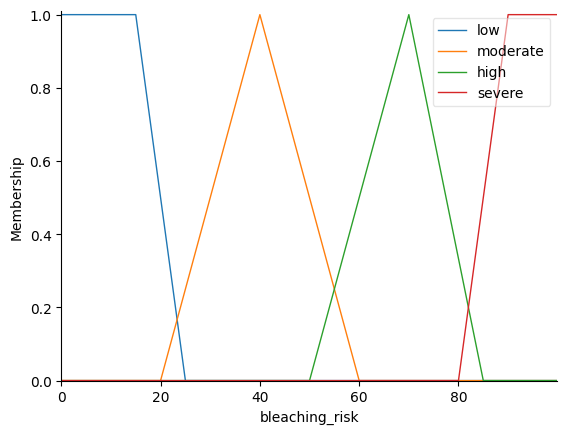

In [14]:
bleaching_risk['low'] = mf.trapmf(bleaching_risk.universe, [0, 0, 15, 25])
bleaching_risk['moderate'] = mf.trimf(bleaching_risk.universe, [20, 40, 60])
bleaching_risk['high'] = mf.trimf(bleaching_risk.universe, [50, 70, 85])
bleaching_risk['severe'] = mf.trapmf(bleaching_risk.universe, [80, 90, 100, 100])

bleaching_risk.view()

### Define Rules

In [15]:
# --- SWT = Low

# ------ Turbidity = Low
rule1 = ctrl.Rule(swt['low'] & turbidity['low'] & windspeed['calm'], bleaching_risk['low'])
rule2 = ctrl.Rule(swt['low'] & turbidity['low'] & windspeed['moderate'], bleaching_risk['low'])
rule3 = ctrl.Rule(swt['low'] & turbidity['low'] & windspeed['strong'], bleaching_risk['low'])

# ------ Turbidity = Moderate
rule4 = ctrl.Rule(swt['low'] & turbidity['moderate'] & windspeed['calm'], bleaching_risk['low'])
rule5 = ctrl.Rule(swt['low'] & turbidity['moderate'] & windspeed['moderate'], bleaching_risk['low'])
rule6 = ctrl.Rule(swt['low'] & turbidity['moderate'] & windspeed['strong'], bleaching_risk['low'])

# ------ Turbidity = High
rule7 = ctrl.Rule(swt['low'] & turbidity['high'] & windspeed['calm'], bleaching_risk['low'])
rule8 = ctrl.Rule(swt['low'] & turbidity['high'] & windspeed['moderate'], bleaching_risk['low'])
rule9 = ctrl.Rule(swt['low'] & turbidity['high'] & windspeed['strong'], bleaching_risk['low'])

# --- SWT = Moderate

# ------ Turbidity = Low
rule10 = ctrl.Rule(swt['moderate'] & turbidity['low'] & windspeed['calm'], bleaching_risk['moderate'])
rule11 = ctrl.Rule(swt['moderate'] & turbidity['low'] & windspeed['moderate'], bleaching_risk['low'])
rule12 = ctrl.Rule(swt['moderate'] & turbidity['low'] & windspeed['strong'], bleaching_risk['low'])

# ------ Turbidity = Moderate
rule13 = ctrl.Rule(swt['moderate'] & turbidity['moderate'] & windspeed['calm'], bleaching_risk['moderate'])
rule14 = ctrl.Rule(swt['moderate'] & turbidity['moderate'] & windspeed['moderate'], bleaching_risk['moderate'])
rule15 = ctrl.Rule(swt['moderate'] & turbidity['moderate'] & windspeed['strong'], bleaching_risk['low'])

# ------ Turbidity = High
rule16 = ctrl.Rule(swt['moderate'] & turbidity['high'] & windspeed['calm'], bleaching_risk['moderate'])
rule17 = ctrl.Rule(swt['moderate'] & turbidity['high'] & windspeed['moderate'], bleaching_risk['moderate'])
rule18 = ctrl.Rule(swt['moderate'] & turbidity['high'] & windspeed['strong'], bleaching_risk['moderate'])

# --- SWT = High

# ------ Turbidity = Low
rule19 = ctrl.Rule(swt['high'] & turbidity['low'] & windspeed['calm'], bleaching_risk['high'])
rule20 = ctrl.Rule(swt['high'] & turbidity['low'] & windspeed['moderate'], bleaching_risk['moderate'])
rule21 = ctrl.Rule(swt['high'] & turbidity['low'] & windspeed['strong'], bleaching_risk['moderate'])

# ------ Turbidity = Moderate
rule22 = ctrl.Rule(swt['high'] & turbidity['moderate'] & windspeed['calm'], bleaching_risk['high'])
rule23 = ctrl.Rule(swt['high'] & turbidity['moderate'] & windspeed['moderate'], bleaching_risk['high'])
rule24 = ctrl.Rule(swt['high'] & turbidity['moderate'] & windspeed['strong'], bleaching_risk['moderate'])

# ------ Turbidity = High
rule25 = ctrl.Rule(swt['high'] & turbidity['high'] & windspeed['calm'], bleaching_risk['severe'])
rule26 = ctrl.Rule(swt['high'] & turbidity['high'] & windspeed['moderate'], bleaching_risk['high'])     
rule27 = ctrl.Rule(swt['high'] & turbidity['high'] & windspeed['strong'], bleaching_risk['moderate'])

# --- SWT = Extreme

# ------ Turbidity = Low
rule28 = ctrl.Rule(swt['extreme'] & turbidity['low'] & windspeed['calm'], bleaching_risk['severe'])
rule29 = ctrl.Rule(swt['extreme'] & turbidity['low'] & windspeed['moderate'], bleaching_risk['high'])
rule30 = ctrl.Rule(swt['extreme'] & turbidity['low'] & windspeed['strong'], bleaching_risk['high'])

# ------ Turbidity = Moderate
rule31 = ctrl.Rule(swt['extreme'] & turbidity['moderate'] & windspeed['calm'], bleaching_risk['severe'])
rule32 = ctrl.Rule(swt['extreme'] & turbidity['moderate'] & windspeed['moderate'], bleaching_risk['severe'])
rule33 = ctrl.Rule(swt['extreme'] & turbidity['moderate'] & windspeed['strong'], bleaching_risk['high'])

# ------ Turbidity = High
rule34 = ctrl.Rule(swt['extreme'] & turbidity['high'] & windspeed['calm'], bleaching_risk['severe'])
rule35 = ctrl.Rule(swt['extreme'] & turbidity['high'] & windspeed['moderate'], bleaching_risk['severe'])     
rule36 = ctrl.Rule(swt['extreme'] & turbidity['high'] & windspeed['strong'], bleaching_risk['severe'])

rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36]


### Construct the fuzzy control system

In [16]:
train_ctrl = ctrl.ControlSystem(rules = rules)
train = ctrl.ControlSystemSimulation(control_system = train_ctrl)

In [17]:
# define the values for the inputs
train.input['swt'] = 301.82
train.input['turbidity'] = 0.0854
train.input['windspeed'] = 1

# compute the outputs
train.compute()

# print the output values
print(train.output)

# to extract one of the outputs
print(train.output['bleaching_risk'])

{'bleaching_risk': 68.27081807081795}
68.27081807081795


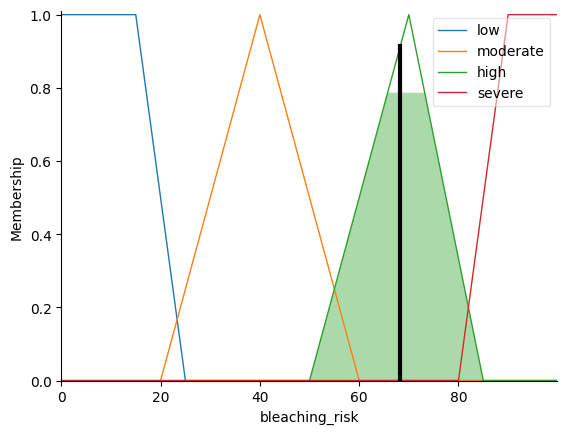

In [18]:
bleaching_risk.view(sim=train)


### Fuzzification of Input Variable 

- SWT

In [32]:
# Example crisp input value
swt_val = 299.75

# Calculate membership degree for each fuzzy set
mu_swt_low = fuzz.interp_membership(swt.universe, swt['low'].mf, swt_val)
mu_swt_mod = fuzz.interp_membership(swt.universe, swt['moderate'].mf, swt_val)
mu_swt_high = fuzz.interp_membership(swt.universe, swt['high'].mf, swt_val)
mu_swt_ext = fuzz.interp_membership(swt.universe, swt['extreme'].mf, swt_val)

# Display the degrees of membership
print(f"Membership Degrees for Sea Water Temperature = {swt_val:.2f} K")
print(f"Low: {mu_swt_low:.2f}")
print(f"Moderate: {mu_swt_mod:.2f}")
print(f"High: {mu_swt_high:.2f}")
print(f"Extreme: {mu_swt_ext:.2f}")

Membership Degrees for Sea Water Temperature = 299.75 K
Low: 0.00
Moderate: 0.42
High: 0.30
Extreme: 0.00


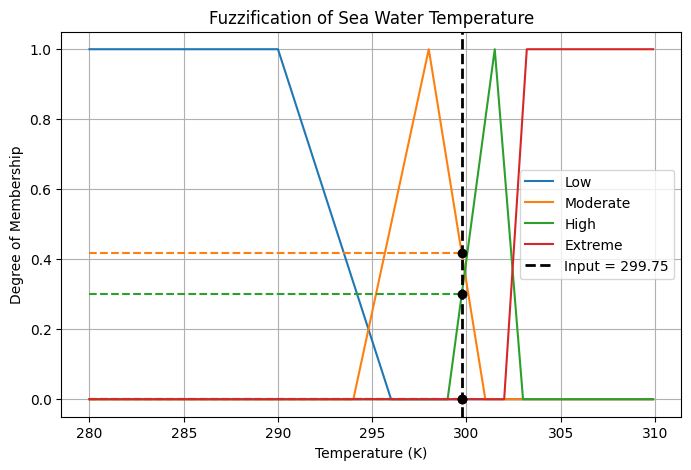

In [51]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(8,5))

# Plot membership functions
plt.plot(swt.universe, swt['low'].mf, color=colors[0], label='Low')
plt.plot(swt.universe, swt['moderate'].mf, color=colors[1], label='Moderate')
plt.plot(swt.universe, swt['high'].mf, color=colors[2], label='High')
plt.plot(swt.universe, swt['extreme'].mf, color=colors[3], label='Extreme')

# Vertical dotted line for crisp input
plt.axvline(swt_val, color='k', linestyle='--', linewidth=2, label=f'Input = {swt_val}')

# Horizontal dotted lines for membership degrees
plt.hlines(mu_swt_low, swt.universe.min(), swt_val, colors=colors[0], linestyles='--', linewidth=1.5)
plt.hlines(mu_swt_mod, swt.universe.min(), swt_val, colors=colors[1], linestyles='--', linewidth=1.5)
plt.hlines(mu_swt_high, swt.universe.min(), swt_val, colors=colors[2], linestyles='--', linewidth=1.5)
plt.hlines(mu_swt_ext, swt.universe.min(), swt_val, colors=colors[3], linestyles='--', linewidth=1.5)

# Mark the intersection points
plt.scatter([swt_val]*4, [mu_swt_low, mu_swt_mod, mu_swt_high, mu_swt_ext], color='k', zorder=5)

plt.title('Fuzzification of Sea Water Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Degree of Membership')
plt.grid(True)
plt.legend()
plt.show()

- Turbidity

In [50]:
# Example Crisp input
turbidity_val = 0.1093

# Calculate degrees of membership
mu_turb_low = fuzz.interp_membership(turbidity.universe, turbidity['low'].mf, turbidity_val)
mu_turb_mod = fuzz.interp_membership(turbidity.universe, turbidity['moderate'].mf, turbidity_val)
mu_turb_high = fuzz.interp_membership(turbidity.universe, turbidity['high'].mf, turbidity_val)

# Display the degrees of membership
print(f"Membership Degrees for Turbidity = {turbidity_val:.4f} K")
print(f"Low: {mu_turb_low:.2f}")
print(f"Moderate: {mu_turb_mod:.2f}")
print(f"High: {mu_turb_high:.2f}")

Membership Degrees for Turbidity = 0.1093 K
Low: 0.98
Moderate: 0.00
High: 0.00


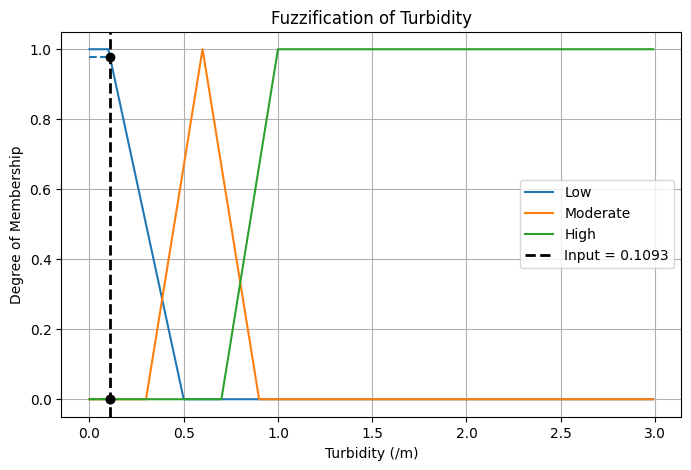

In [52]:
# Colors similar to .view()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(8,5))

# Plot membership functions
plt.plot(turbidity.universe, turbidity['low'].mf, color=colors[0], label='Low')
plt.plot(turbidity.universe, turbidity['moderate'].mf, color=colors[1], label='Moderate')
plt.plot(turbidity.universe, turbidity['high'].mf, color=colors[2], label='High')

# Vertical dotted line for crisp input
plt.axvline(turbidity_val, color='k', linestyle='--', linewidth=2, label=f'Input = {turbidity_val:.4f}')

# Horizontal dotted lines for membership degrees
plt.hlines(mu_turb_low, turbidity.universe.min(), turbidity_val, colors=colors[0], linestyles='--', linewidth=1.5)
plt.hlines(mu_turb_mod, turbidity.universe.min(), turbidity_val, colors=colors[1], linestyles='--', linewidth=1.5)
plt.hlines(mu_turb_high, turbidity.universe.min(), turbidity_val, colors=colors[2], linestyles='--', linewidth=1.5)

# Intersection points
plt.scatter([turbidity_val]*3, [mu_turb_low, mu_turb_mod, mu_turb_high], color='k', zorder=5)

plt.title('Fuzzification of Turbidity')
plt.xlabel('Turbidity (/m)')
plt.ylabel('Degree of Membership')
plt.grid(True)
plt.legend()
plt.show()

- Wind Speed


In [ ]:
# Example Crisp input
windspeed_val = 3

# Calculate degrees of membership
mu_ws_calm = fuzz.interp_membership(windspeed.universe, windspeed['calm'].mf, windspeed_val)
mu_ws_mod = fuzz.interp_membership(windspeed.universe, windspeed['moderate'].mf, windspeed_val)
mu_ws_strong = fuzz.interp_membership(windspeed.universe, windspeed['strong'].mf, windspeed_val)

# Display the degrees of membership
print(f"Membership Degrees for Wind Speed = {windspeed_val:.2f} m/s")
print(f"Calm: {mu_ws_calm:.2f}")
print(f"Moderate: {mu_ws_mod:.2f}")
print(f"Strong: {mu_ws_strong:.2f}")

Membership Degrees for Wind Speed = 3.00 m/s
Calm: 0.40
Moderate: 0.00
Strong: 0.00


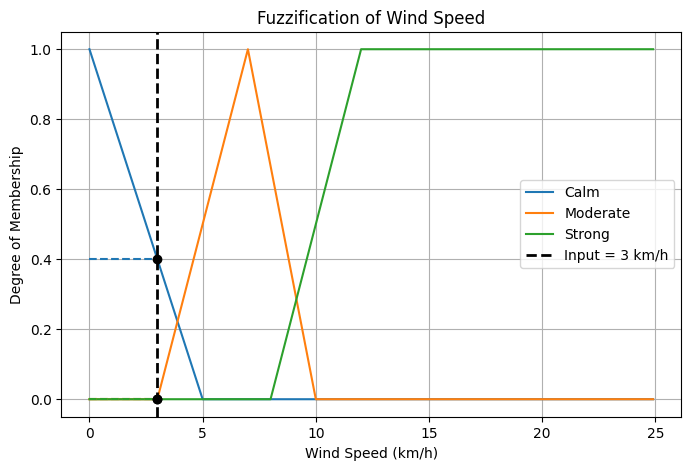

In [53]:
# Display the degrees of membership
plt.figure(figsize=(8,5))

# Plot membership functions
plt.plot(windspeed.universe, windspeed['calm'].mf, color=colors[0], label='Calm')
plt.plot(windspeed.universe, windspeed['moderate'].mf, color=colors[1], label='Moderate')
plt.plot(windspeed.universe, windspeed['strong'].mf, color=colors[2], label='Strong')

# Vertical dotted line for crisp input
plt.axvline(windspeed_val, color='k', linestyle='--', linewidth=2, label=f'Input = {windspeed_val} km/h')

# Horizontal dotted lines for membership degrees
plt.hlines(mu_ws_calm, windspeed.universe.min(), windspeed_val, colors=colors[0], linestyles='--', linewidth=1.5)
plt.hlines(mu_ws_mod, windspeed.universe.min(), windspeed_val, colors=colors[1], linestyles='--', linewidth=1.5)
plt.hlines(mu_ws_strong, windspeed.universe.min(), windspeed_val, colors=colors[2], linestyles='--', linewidth=1.5)

# Intersection points
plt.scatter([windspeed_val]*3, [mu_ws_calm, mu_ws_mod, mu_ws_strong], color='k', zorder=5)

plt.title('Fuzzification of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Degree of Membership')
plt.grid(True)
plt.legend()
plt.show()
